# Week 6 - Deep Learning

The goal of this assignment is to test and compare some simple deep learning architectures for the problem of image classification. We will be using the Tensorflow framework.
The CIFAR-10 dataset contains 60000 images divided into 10 classes. The set is split in 50000 and 10000 samples for the training and testing set, respectively. The tutorial found at [https://www.tensorflow.org/tutorials/images/cnn] gives a good introduction to this practical exercise. The essential code for this tutorial can be found in the provided script 'ConvNet.py' or as a Jupyter notebook in [https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb].

## Imports

In [4]:
import numpy as np
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

## Setup

In [2]:
RNDS = 1389

devices = tf.config.list_physical_devices('GPU')
if len(devices):
  device = '/device:GPU:0'
else:
  device = "/device:CPU:0"

## Data

In [5]:
with tf.device(device):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    train_images, test_images = train_images / 255.0, test_images / 255.0 # normalise pixel values to be between 0 and 1

## MLP

In [16]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9752 - accuracy: 0.3127 - val_loss: 1.9056 - val_accuracy: 0.3415
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8912 - accuracy: 0.3490 - val_loss: 1.9386 - val_accuracy: 0.3269
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8555 - accuracy: 0.3612 - val_loss: 1.8783 - val_accuracy: 0.3509
Epoch 4/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8483 - accuracy: 0.3701 - val_loss: 1.8258 - val_accuracy: 0.3660
Epoch 5/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8342 - accuracy: 0.3726 - val_loss: 1.8292 - val_accuracy: 0.3647
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8241 - accuracy: 0.3747 - val_loss: 1.8134 - val_accuracy: 0.3726
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8124 - accuracy: 0.3802 - val_loss: 1.8448 - val_accuracy:

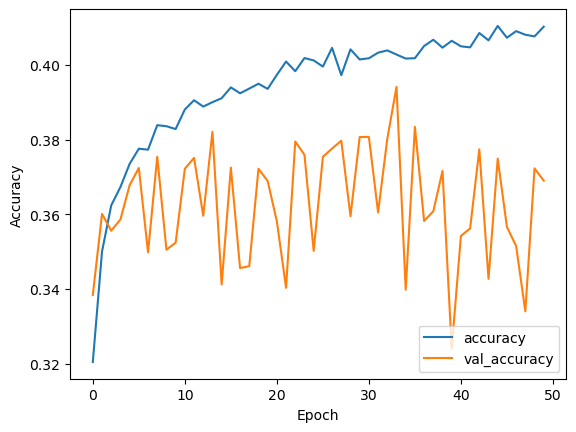

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## ConvNet

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # from this we know that input dimensions are 32x32x3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1250/1250 [==============================] - 11s 5ms/step - loss: 1.5853 - accuracy: 0.4198 - val_loss: 1.4206 - val_accuracy: 0.4796
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2441 - accuracy: 0.5559 - val_loss: 1.2165 - val_accuracy: 0.5638
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0861 - accuracy: 0.6155 - val_loss: 1.0729 - val_accuracy: 0.6201
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9892 - accuracy: 0.6495 - val_loss: 1.0026 - val_accuracy: 0.6396
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9141 - accuracy: 0.6770 - val_loss: 1.0398 - val_accuracy: 0.6390
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8575 - accuracy: 0.6995 - val_loss: 0.9204 - val_accuracy: 0.6798
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8122 - accuracy: 0.7121 - val_loss: 0.9126 - val_accuracy

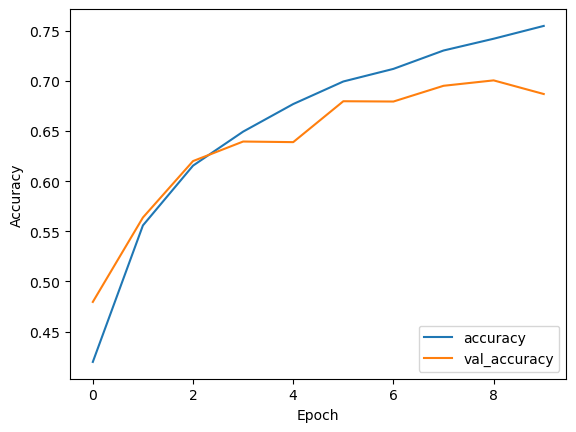

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Utility

In [20]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [21]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=50)

class TimeStopping(tf.keras.callbacks.Callback):
    def __init__(self, seconds):
        super(TimeStopping, self).__init__()
        # Stop training after `seconds` seconds have passed
        self.seconds = seconds
        self.start_time = None

    def on_train_begin(self, logs=None):
        # Record the time at which training begins
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        # Check how much time has passed, and stop training if necessary
        elapsed_time = time.time() - self.start_time
        if elapsed_time > self.seconds:
            self.model.stop_training = True
            print(f"\nStopping training: elapsed time {elapsed_time:.2f}s > limit {self.seconds}s")

## Exercise 1

Modify the provided MLP model. Use architectures with 0, 1 and 2 hidden layers. Keep the complexity of the model bounded, so runs do not take much more than 1 hour to reach the maximum of testing accuracy. Notice that the input needs to be "flattened", since there is no spatial structure 
in this fully connected design. This can be achieved by adding a dummy layer with no free parameters with "layers.Flatten()" as the first layer in the constructor "model.Sequential()". Obtain the learning curves and discuss the results.
Report the optimizer in use, initialization parameters, the learning rate, etc. Is early stopping convenient in this model?

### Models

In [22]:
# 0 layers
mlp_0_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])
mlp_0_layer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 1 layer
mlp_1_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(1536, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_1_layer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 2 layers
mlp_2_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(1536, activation='relu'),
    layers.Dense(768, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_2_layer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/400
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9814 - accuracy: 0.3074 - f1_score: 0.1545 - val_loss: 1.9194 - val_accuracy: 0.3391 - val_f1_score: 0.1939
Epoch 2/400
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8873 - accuracy: 0.3473 - f1_score: 0.2162 - val_loss: 1.9463 - val_accuracy: 0.3299 - val_f1_score: 0.2470
Epoch 3/400
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8573 - accuracy: 0.3579 - f1_score: 0.2359 - val_loss: 1.8913 - val_accuracy: 0.3406 - val_f1_score: 0.2232
Epoch 4/400
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8362 - accuracy: 0.3695 - f1_score: 0.2447 - val_loss: 1.8515 - val_accuracy: 0.3562 - val_f1_score: 0.2282
Epoch 5/400
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8382 - accuracy: 0.3712 - f1_score: 0.2566 - val_loss: 2.0907 - val_accuracy: 0.3264 - val_f1_score: 0.2668
Epoch 6/400
1250/1250 [==============================] - 5s 4ms/s

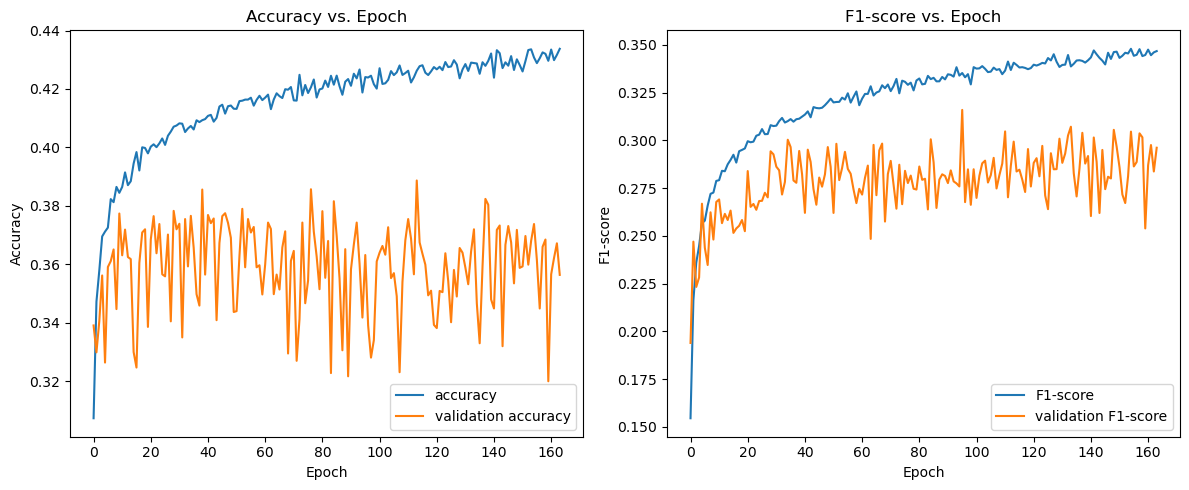

In [23]:
# fitting for 0 layer model
mlp_0_layer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_0_layer = mlp_0_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_0_layer.summary()

test_loss, test_acc, test_f1 = mlp_0_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_0_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_0_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_0_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_0_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

Epoch 1/400
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9432 - accuracy: 0.3198 - f1_score: 0.1076 - val_loss: 1.7786 - val_accuracy: 0.3689 - val_f1_score: 0.1398
Epoch 2/400
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7193 - accuracy: 0.3883 - f1_score: 0.2062 - val_loss: 1.6633 - val_accuracy: 0.4109 - val_f1_score: 0.2281
Epoch 3/400
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6490 - accuracy: 0.4133 - f1_score: 0.2605 - val_loss: 1.6099 - val_accuracy: 0.4253 - val_f1_score: 0.3104
Epoch 4/400
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5959 - accuracy: 0.4346 - f1_score: 0.2930 - val_loss: 1.5873 - val_accuracy: 0.4337 - val_f1_score: 0.2754
Epoch 5/400
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5586 - accuracy: 0.4452 - f1_score: 0.3141 - val_loss: 1.5485 - val_accuracy: 0.4597 - val_f1_score: 0.3091
Epoch 6/400
1250/1250 [==============================] - 6s 5ms/s

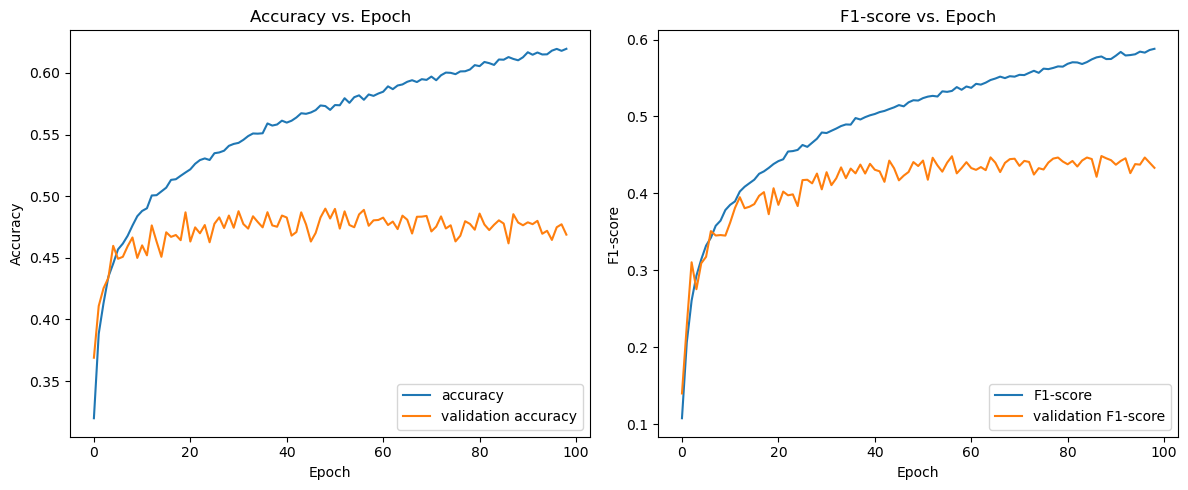

In [24]:
# fitting for 1 layer model
mlp_1_layer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_1_layer = mlp_1_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_1_layer.summary()

test_loss, test_acc, test_f1 = mlp_1_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_1_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_1_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_1_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_1_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

Epoch 1/400
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9131 - accuracy: 0.3171 - f1_score: 0.1204 - val_loss: 1.7285 - val_accuracy: 0.3726 - val_f1_score: 0.1884
Epoch 2/400
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6939 - accuracy: 0.3928 - f1_score: 0.2343 - val_loss: 1.6351 - val_accuracy: 0.4171 - val_f1_score: 0.2506
Epoch 3/400
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6157 - accuracy: 0.4245 - f1_score: 0.2852 - val_loss: 1.5827 - val_accuracy: 0.4352 - val_f1_score: 0.2862
Epoch 4/400
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5556 - accuracy: 0.4436 - f1_score: 0.3195 - val_loss: 1.5521 - val_accuracy: 0.4412 - val_f1_score: 0.3143
Epoch 5/400
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5114 - accuracy: 0.4605 - f1_score: 0.3479 - val_loss: 1.5159 - val_accuracy: 0.4622 - val_f1_score: 0.3472
Epoch 6/400
1250/1250 [==============================] - 7s 5ms/s

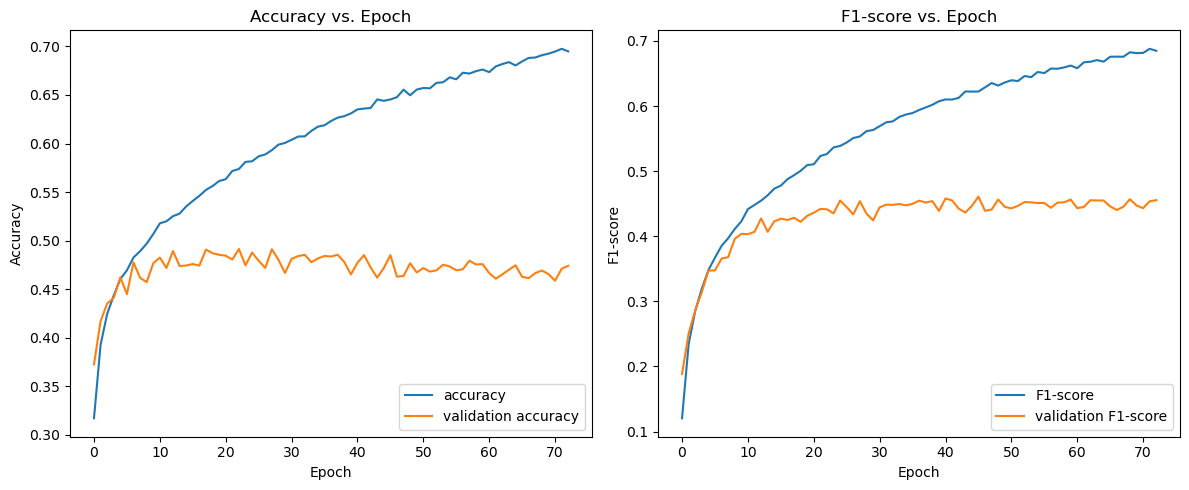

In [25]:
# fitting for 2 layer model
mlp_2_layer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_2_layer = mlp_2_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_2_layer.summary()

test_loss, test_acc, test_f1 = mlp_2_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_2_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_2_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_2_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_2_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

## Exercise 2

Reuse the code from Exercise 1 to build and run an MLP with one hidden layer, as big a you can. Compare the performance of your design with the results appearing in Table 1 of [https://arxiv.org/pdf/1611.03530.pdf] for an MLP of 512 units in a single hidden layer. Report the best result found for a maximum of 1000 epochs or 2 hours CPU running time.
The best accuracy amongst all teams will be awarded extra points.

In [8]:
with tf.device(device):
    # we have to have an actual validation set for this, we cannot evaluate the model properly otherwise
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=RNDS)
    # we need to augment our data to improve the model's performance, otherwise it'll get stuck like models from exercise 1
    train_datagen = ImageDataGenerator(rotation_range=0, horizontal_flip=True) # randomly rotates the image and/or flips it horizontally
    train_datagen.fit(train_images)
    val_datagen = ImageDataGenerator() # does nothing
    val_datagen.fit(train_images)

In [11]:
tf.debugging.set_log_device_placement(True)
batch_size = 32
with tf.device(device):
    weight_decay = 0.0001 # for dense layers
    alpha_value = 0.1 # for LeakyReLU
    num_epochs = 1000 # to be within 2 CPU hours

    # redefine our 1 layer model
    mlp_1_layer = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(6144, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

    mlp_1_layer.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy', f1_score])

    # early_stop = EarlyStopping(monitor='val_accuracy', patience=num_epochs // 20) # since we're interested in accuracy now
    time_stopping_callback = TimeStopping(seconds=7200)
    checkpoint = ModelCheckpoint('./models/ass5_mlp_1_layer.h5', monitor='val_accuracy', save_best_only=True)

    mlp_1_layer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6144)              18880512  
_________________________________________________________________
batch_normalization_2 (Batch (None, 6144)              24576     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                61450     
Total params: 18,966,538
Trainable params: 18,954,250
Non-trainable params: 12,288
_________________________________________________________________


In [12]:
with tf.device(device):
    history_mlp_1_layer = mlp_1_layer.fit(train_datagen.flow(train_images, train_labels, batch_size=batch_size),
                                        validation_data=val_datagen.flow(val_images, val_labels, batch_size=batch_size),
                                        callbacks=[checkpoint, time_stopping_callback],
                                        epochs=num_epochs,
                                        steps_per_epoch=len(train_images) // batch_size)

    best_model = models.load_model('./models/ass5_mlp_1_layer.h5', custom_objects={'f1_score': f1_score})
    test_loss, test_acc, test_f1 = best_model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc*100:.4f}%", f"Test F1-Score: {test_f1:.4f}")

Epoch 1/1000
1250/1250 [==============================] - 11s 8ms/step - loss: 2.6380 - accuracy: 0.2867 - f1_score: 0.2191 - val_loss: 2.1697 - val_accuracy: 0.3213 - val_f1_score: 0.2270
Epoch 2/1000
1250/1250 [==============================] - 9s 8ms/step - loss: 1.8145 - accuracy: 0.3684 - f1_score: 0.2163 - val_loss: 2.0387 - val_accuracy: 0.2913 - val_f1_score: 0.2073
Epoch 3/1000
1250/1250 [==============================] - 9s 8ms/step - loss: 1.7335 - accuracy: 0.3896 - f1_score: 0.2306 - val_loss: 1.8768 - val_accuracy: 0.3542 - val_f1_score: 0.2209
Epoch 4/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6984 - accuracy: 0.3987 - f1_score: 0.2456 - val_loss: 1.8468 - val_accuracy: 0.3606 - val_f1_score: 0.2057
Epoch 5/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6672 - accuracy: 0.4129 - f1_score: 0.2699 - val_loss: 1.9189 - val_accuracy: 0.3569 - val_f1_score: 0.2757
Epoch 6/1000
1250/1250 [==============================] - 9

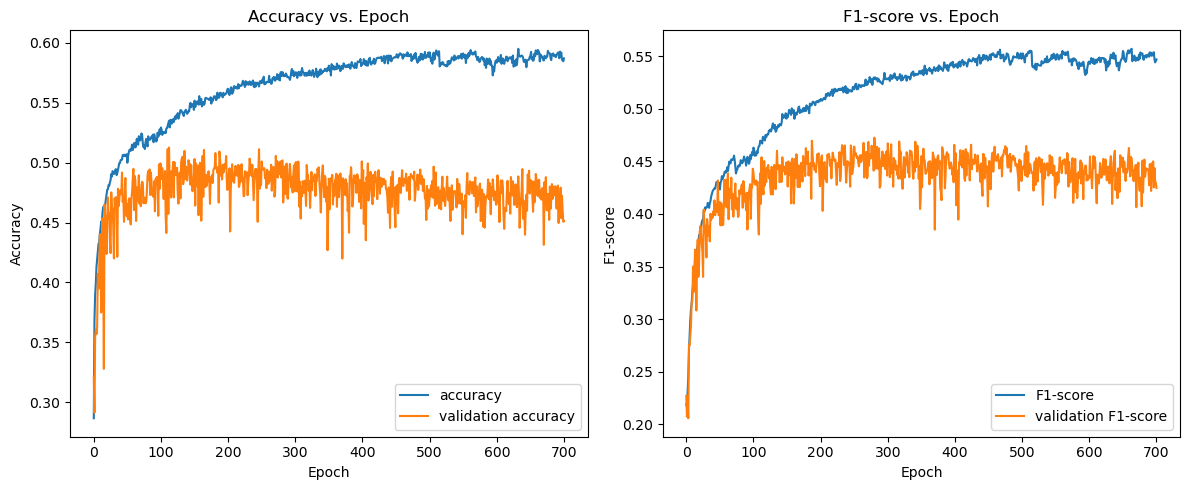

In [13]:
# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_1_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_1_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_1_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_1_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

## Exercise 3

Study the performance properties of the convolutional network provided. How is the learning affected if instead of ReLU units, tanh() activations are used? What is the reason for this? Compare also at least two different optimizer algorithms.

## Exercise 4

Try to outperform the convolutional network from Exercise 3 with an MLP that uses approximately the same number of parameters.
Report your results and explain them.